<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- [x] The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- [x] Normalize the data (all features should have roughly the same scale)
- [x] Import the type of model and layers that you will need from Keras.
- [x] Instantiate a model object and use `model.add()` to add layers to your model
- [x] Since this is a regression model you will have a single output node in the final layer.
- [ ] Use activation functions that are appropriate for this task
- [x] Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- [x] Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

### Part 1

In [0]:
##### Your Code Here #####
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer

# import a model type, Sequential
# import types of layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import tensorflow as tf

import matplotlib.pyplot as plt

np.random.seed(812)

In [0]:
# Load the data and split
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [96]:
# shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [0]:
# casting int to float and feature normalization
# X_train = X_train.astype('float32') / 255.
# X_test = X_test.astype('float32') / 255.

# Normalize data with sckitlearn
normalizer = Normalizer()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_train)

In [0]:
# instantiate Sequential model
model = Sequential()

In [99]:
# Add layers to NN
model.add(keras.layers.Dense(1, input_dim=13, activation='relu')) # INPUT LAYER
model.add(keras.layers.Dense(1)) # OUTPUT LAYER
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 14        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Fit model
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/150
323/323 [==============================] - 0s 765us/sample - loss: 577.6769 - val_loss: 649.1602
Epoch 2/150
323/323 [==============================] - 0s 55us/sample - loss: 576.3674 - val_loss: 647.7874
Epoch 3/150
323/323 [==============================] - 0s 56us/sample - loss: 575.1050 - val_loss: 646.4650
Epoch 4/150
323/323 [==============================] - 0s 48us/sample - loss: 573.8627 - val_loss: 645.1745
Epoch 5/150
323/323 [==============================] - 0s 61us/sample - loss: 572.6853 - val_loss: 643.9208
Epoch 6/150
323/323 [==============================] - 0s 60us/sample - loss: 571.5475 - val_loss: 642.7098
Epoch 7/150
323/323 [==============================] - 0s 58us/sample - loss: 570.4222 - val_loss: 641.5459
Epoch 8/150
323/323 [==============================] - 0s 59us/sample - loss: 569.3537 - val_loss: 640.4089
Epoch 9/150
323/323 [==============================] - 0s 51us/sample - loss: 568.3601 - v

In [0]:
# Prediction
predictions = model.predict(X_train)

In [102]:
# Training set error for NN (using SKL)
mean_squared_error(y_train, predictions)

516.4847369472426

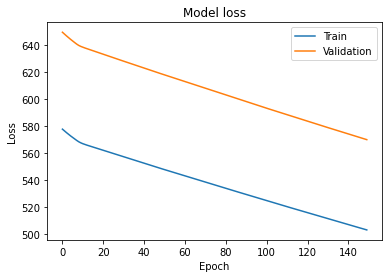

In [104]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

### Part 2 - Feature Engineering 

In [0]:
# Adding two new hidden layers
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model = Sequential([
    Flatten(),
    Dense(1280, input_dim=784, activation='relu'),
    Dense(1280, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback])

Train on 404 samples, validate on 102 samples
Epoch 1/10
404/404 [==============================] - 1s 2ms/sample - loss: 589.8214 - accuracy: 0.5322 - val_loss: 851.2456 - val_accuracy: 0.0000e+00
Epoch 2/10
404/404 [==============================] - 0s 912us/sample - loss: 1310.9109 - accuracy: 0.0000e+00 - val_loss: 2223.1177 - val_accuracy: 0.0000e+00
Epoch 3/10
404/404 [==============================] - 0s 939us/sample - loss: 3241.2104 - accuracy: 0.0000e+00 - val_loss: 5084.7892 - val_accuracy: 0.0000e+00
Epoch 4/10
404/404 [==============================] - 0s 915us/sample - loss: 6770.8303 - accuracy: 0.0000e+00 - val_loss: 9727.1218 - val_accuracy: 0.0000e+00
Epoch 5/10
404/404 [==============================] - 0s 932us/sample - loss: 12066.0125 - accuracy: 0.0000e+00 - val_loss: 16429.5852 - val_accuracy: 0.0000e+00
Epoch 6/10
404/404 [==============================] - 0s 920us/sample - loss: 19602.0678 - accuracy: 0.0000e+00 - val_loss: 25592.7835 - val_accuracy: 0.0000e+0

# Linear Regression Model

In [0]:
lr_model = LinearRegression()

In [106]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions_lr = lr_model.predict(X_train)

In [108]:
# Linear regression training set error.
mean_squared_error(y_train, predictions_lr)

22.77423909605731

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
##### Your Code Here #####

In [110]:
# Load data.
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

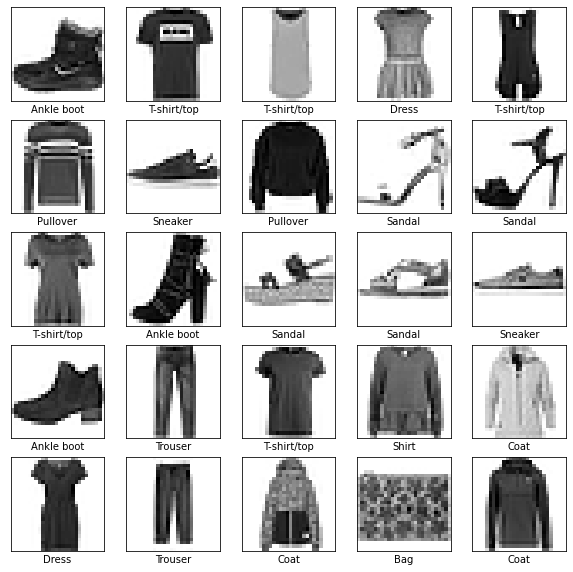

In [113]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.